In [526]:
from tools import load
import numpy as np
import re
import math
import matplotlib.pyplot as plt

In [527]:
data =np.array(load(line_splitter=False, to_list=True))

start = np.array(np.where(data == "S")).T[0]
end = np.array(np.where(data == "E")).T[0]
data[data == "#"] = 1
data[data != "1"] = 0
data = data.astype(bool)

In [528]:
# Build path distance map.
to_process = [end]

distance_map = np.zeros(data.shape)
distance_map[:,:] = np.Inf
distance_map[end[0], end[1]] = 0 

while len(to_process): 
    c = to_process.pop(0)
    new_distance = distance_map[c[0], c[1]] + 1

    if c[0] != 0:
        if not data[c[0]-1, c[1]]:
            if distance_map[c[0]-1, c[1]] > new_distance:
                distance_map[c[0]-1, c[1]] = new_distance
                to_process.append((c[0]-1, c[1]))
                        
    if c[0] != (data.shape[0]-1):
        if not data[c[0]+1, c[1]]:
            if distance_map[c[0]+1, c[1]] > new_distance:
                distance_map[c[0]+1, c[1]] = new_distance
                to_process.append((c[0]+1, c[1]))
     

    if c[1] != 0:
        if not data[c[0], c[1]-1]:
            if distance_map[c[0], c[1]-1] > new_distance:
                distance_map[c[0], c[1]-1] = new_distance
                to_process.append((c[0], c[1]-1))
        
    if c[1] != (data.shape[1]-1):
        if not data[c[0], c[1]+1]:
            if distance_map[c[0], c[1]+1] > new_distance:
                distance_map[c[0], c[1]+1] = new_distance
                to_process.append((c[0], c[1]+1))



9348.0


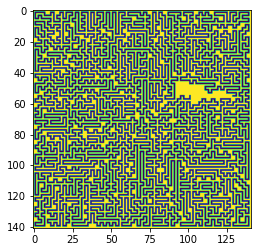

In [529]:
plt.imshow(data)
plt.imshow(distance_map)
print(distance_map[start[0], start[1]])

In [530]:
# Now check for gaps.

# gap condition: P G P in all directions. Find all candidates first. 
jump_map = np.zeros(data.shape) # verti
jump_map2 = np.zeros(data.shape) # hori

candidates = np.array(np.where(data == 1)).T


# vert path
for c in candidates:

    if ( c[0] != 0) and (c[0] != (data.shape[0]-1)):
        if (not data[c[0]-1, c[1]]) and (not data[c[0]+1, c[1]]):
            d1 = distance_map[c[0]-1, c[1]]
            d2 = distance_map[c[0]+1, c[1]]
            if d1 <= d2: 
                saving = d2 - (d1 + 2) # 2 steps to move to the new field
            else:
                saving = d1 - (d2 + 2)
            jump_map[c[0], c[1]] = saving



    if ( c[1] != 0) and (c[1] != (data.shape[1]-1)):
        if (not data[c[0], c[1]-1]) and (not data[c[0], c[1]+1]):
            d1 = distance_map[c[0], c[1]-1]
            d2 = distance_map[c[0], c[1]+1]
            if d1 <= d2: 
                saving = d2 - (d1 + 2) # 2 steps to move to the new field
            else:
                saving = d1 - (d2 + 2)
            jump_map2[c[0], c[1]] = saving


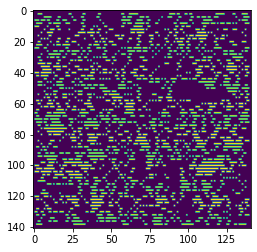

In [531]:
plt.imshow(jump_map > 0 )
plt.imshow(distance_map)

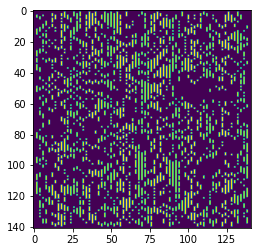

In [532]:
plt.imshow(jump_map2 > 0 )
plt.imshow(distance_map)

In [533]:
to_check= 100
(jump_map >= to_check).sum() + (jump_map2 >= to_check).sum()

1321

In [536]:
count = {x:0 for x in range(int(distance_map[~(distance_map == np.inf)].max()+1))}
candidates = np.array(np.where(data != 1)).T
w, h =data.shape

for  c in candidates:
    xcoords, ycoords = np.meshgrid(np.arange(w), np.arange(h))
    target = (np.abs(ycoords - c[0])+ np.abs(xcoords - c[1])).astype(float)

    # remove all items that are too far away.
    target[target > 20] = np.nan
    #remove all wall values
    target[distance_map == np.inf] = np.nan
    # add moving distance on top 
    target = target + distance_map
    # remove all items that would increase the distance
    target[target >= distance_map[c[0], c[1]]] = np.nan
    target =distance_map[c[0], c[1]] - target
    target = target[~np.isnan(target)]
    
    for x in target:
        count[x] +=1


In [542]:
sum(np.array([[x,count[x]] for x in range(100,int(distance_map[~(distance_map == np.inf)].max()+1)) if count[x] > 0 ]).T[1])

971737